In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.optimize import minimize

rng = np.random.default_rng(seed=1)

---

## Task 0 
Play around with the jupyter notebook from the lecture and see if you can get better accuracy results.

__Solution__: My best accuracy was 0.76 with bp, s3 and s5



---

## Task 1: Least-Squares Method Analytically 

Given are 10 value pairs $(k, y_k)$ for $k$ from 1 to 10, where the $y_k$ are Poisson-distributed measurements around expectation values $\mu_k = a\cdot k$.   
The parameter $a$ is to be estimated using the weighted least-squares method. To do this, consider the following $\chi^2$ functions:

$$\chi^2 = \sum_{k=1}^{10} w_k (y_k - \mu_k)^2 \quad\text{with}\quad w_k \in \left\{1, \frac{1}{y_k}, \frac{1}{\mu_k} \right\}$$

### 1.1

Analytically calculate the estimators $\hat{a}$ as a function of $y_k$ which minimize the corresponding $\chi^2$ functions. Are there special cases where the estimators are not defined?

---

Generally, we obtain the estimate by solving $\dfrac{\partial\chi^2(a)}{\partial a} \overset!= 0$.

For $w_k = 1$:
\begin{align}
    \chi^2 &= \sum_k\left(y_k - a k\right)^2 \\
           &= \sum_k y_k^2 - 2 y_k a k + a^2 k^2 \\
    \frac{\partial\chi^2}{\partial a} &= -2\sum_k y_k k + 2\sum_k a k^2 \overset{!}{=} 0 \\
    &\Rightarrow a \sum_k k^2 = \sum_k y_k k \\
    &\Rightarrow \hat a = \frac{\sum_k y_k k}{\sum_k k^2}
\end{align}

For $w_k = 1 / y_k$:
\begin{align}
    \chi^2 &= \sum_k \frac{y_k^2 - 2 y_k a k + a^2 k^2}{y_k} \\
           &= \sum_k y_k - 2 a k + \frac{a^2 k^2}{y_k} \\
    \frac{\partial\chi^2}{\partial a} &= -2\sum_k k + 2a\sum_k \frac{k^2}{y_k} \overset{!}{=} 0 \\
    &\Rightarrow a \sum_k \frac{k^2}{y_k} = \sum_k k \\
    &\Rightarrow \hat a = \frac{\sum_k k}{\sum_k \frac{k^2}{y_k}}
\end{align}

For $w_k = 1 / \mu_k = 1 / (a k)$:
\begin{align}
    \chi^2 &= \sum_k \frac{y_k^2 - 2 y_k a k + a^2 k^2}{ak} \\
           &= \sum_k \frac{y_k^2}{ak} - 2y_k + ak \\
    \frac{\partial\chi^2}{\partial a} &= -\frac{1}{a^2}\sum_k \frac{y_k^2}{k} + \sum_k k \overset{!}{=} 0 \\
    &\Rightarrow a^2 = \frac{\sum_k \frac{y_k^2}{k}}{\sum_k k} \\
    &\Rightarrow \hat a = \sqrt{\frac{\sum_k \frac{y_k^2}{k}}{\sum_k k}}
\end{align}

---
### 1.2

Compute the distributions of the estimators $\hat{a}$ using Monte-Carlo simulation for $a = 1$ and $a = 100$. Which estimator has the smallest bias and variance?

---

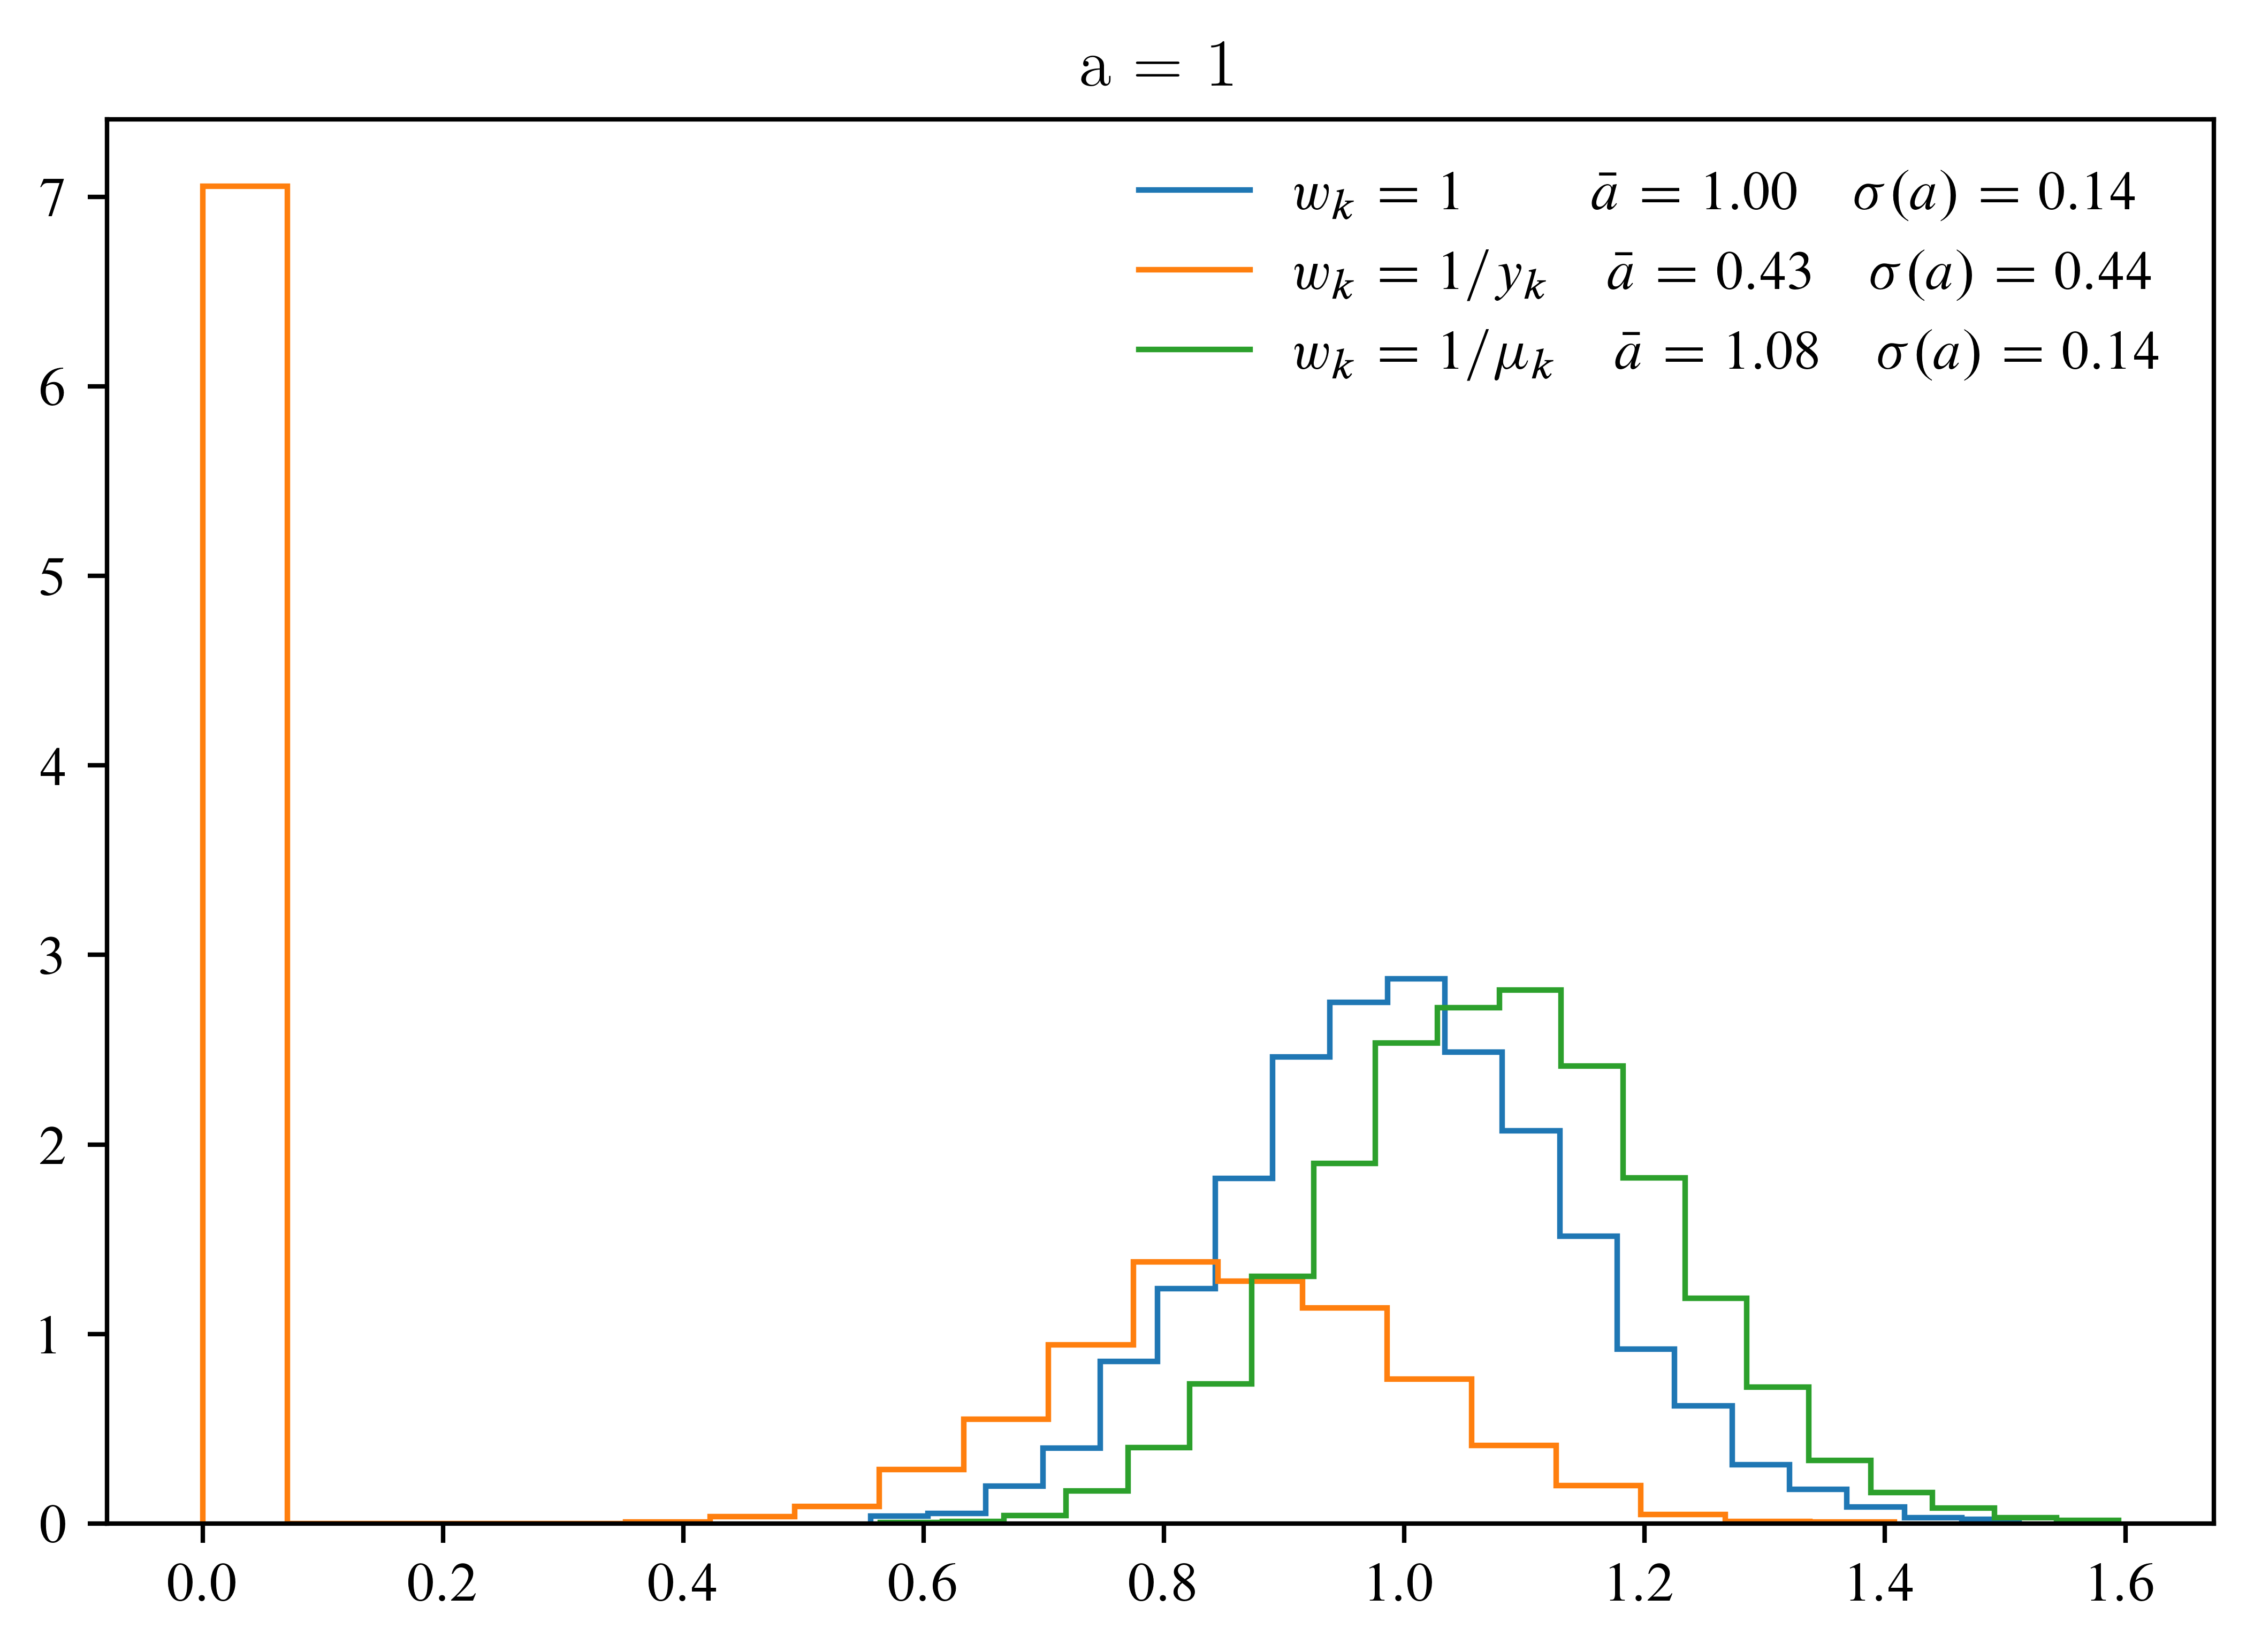

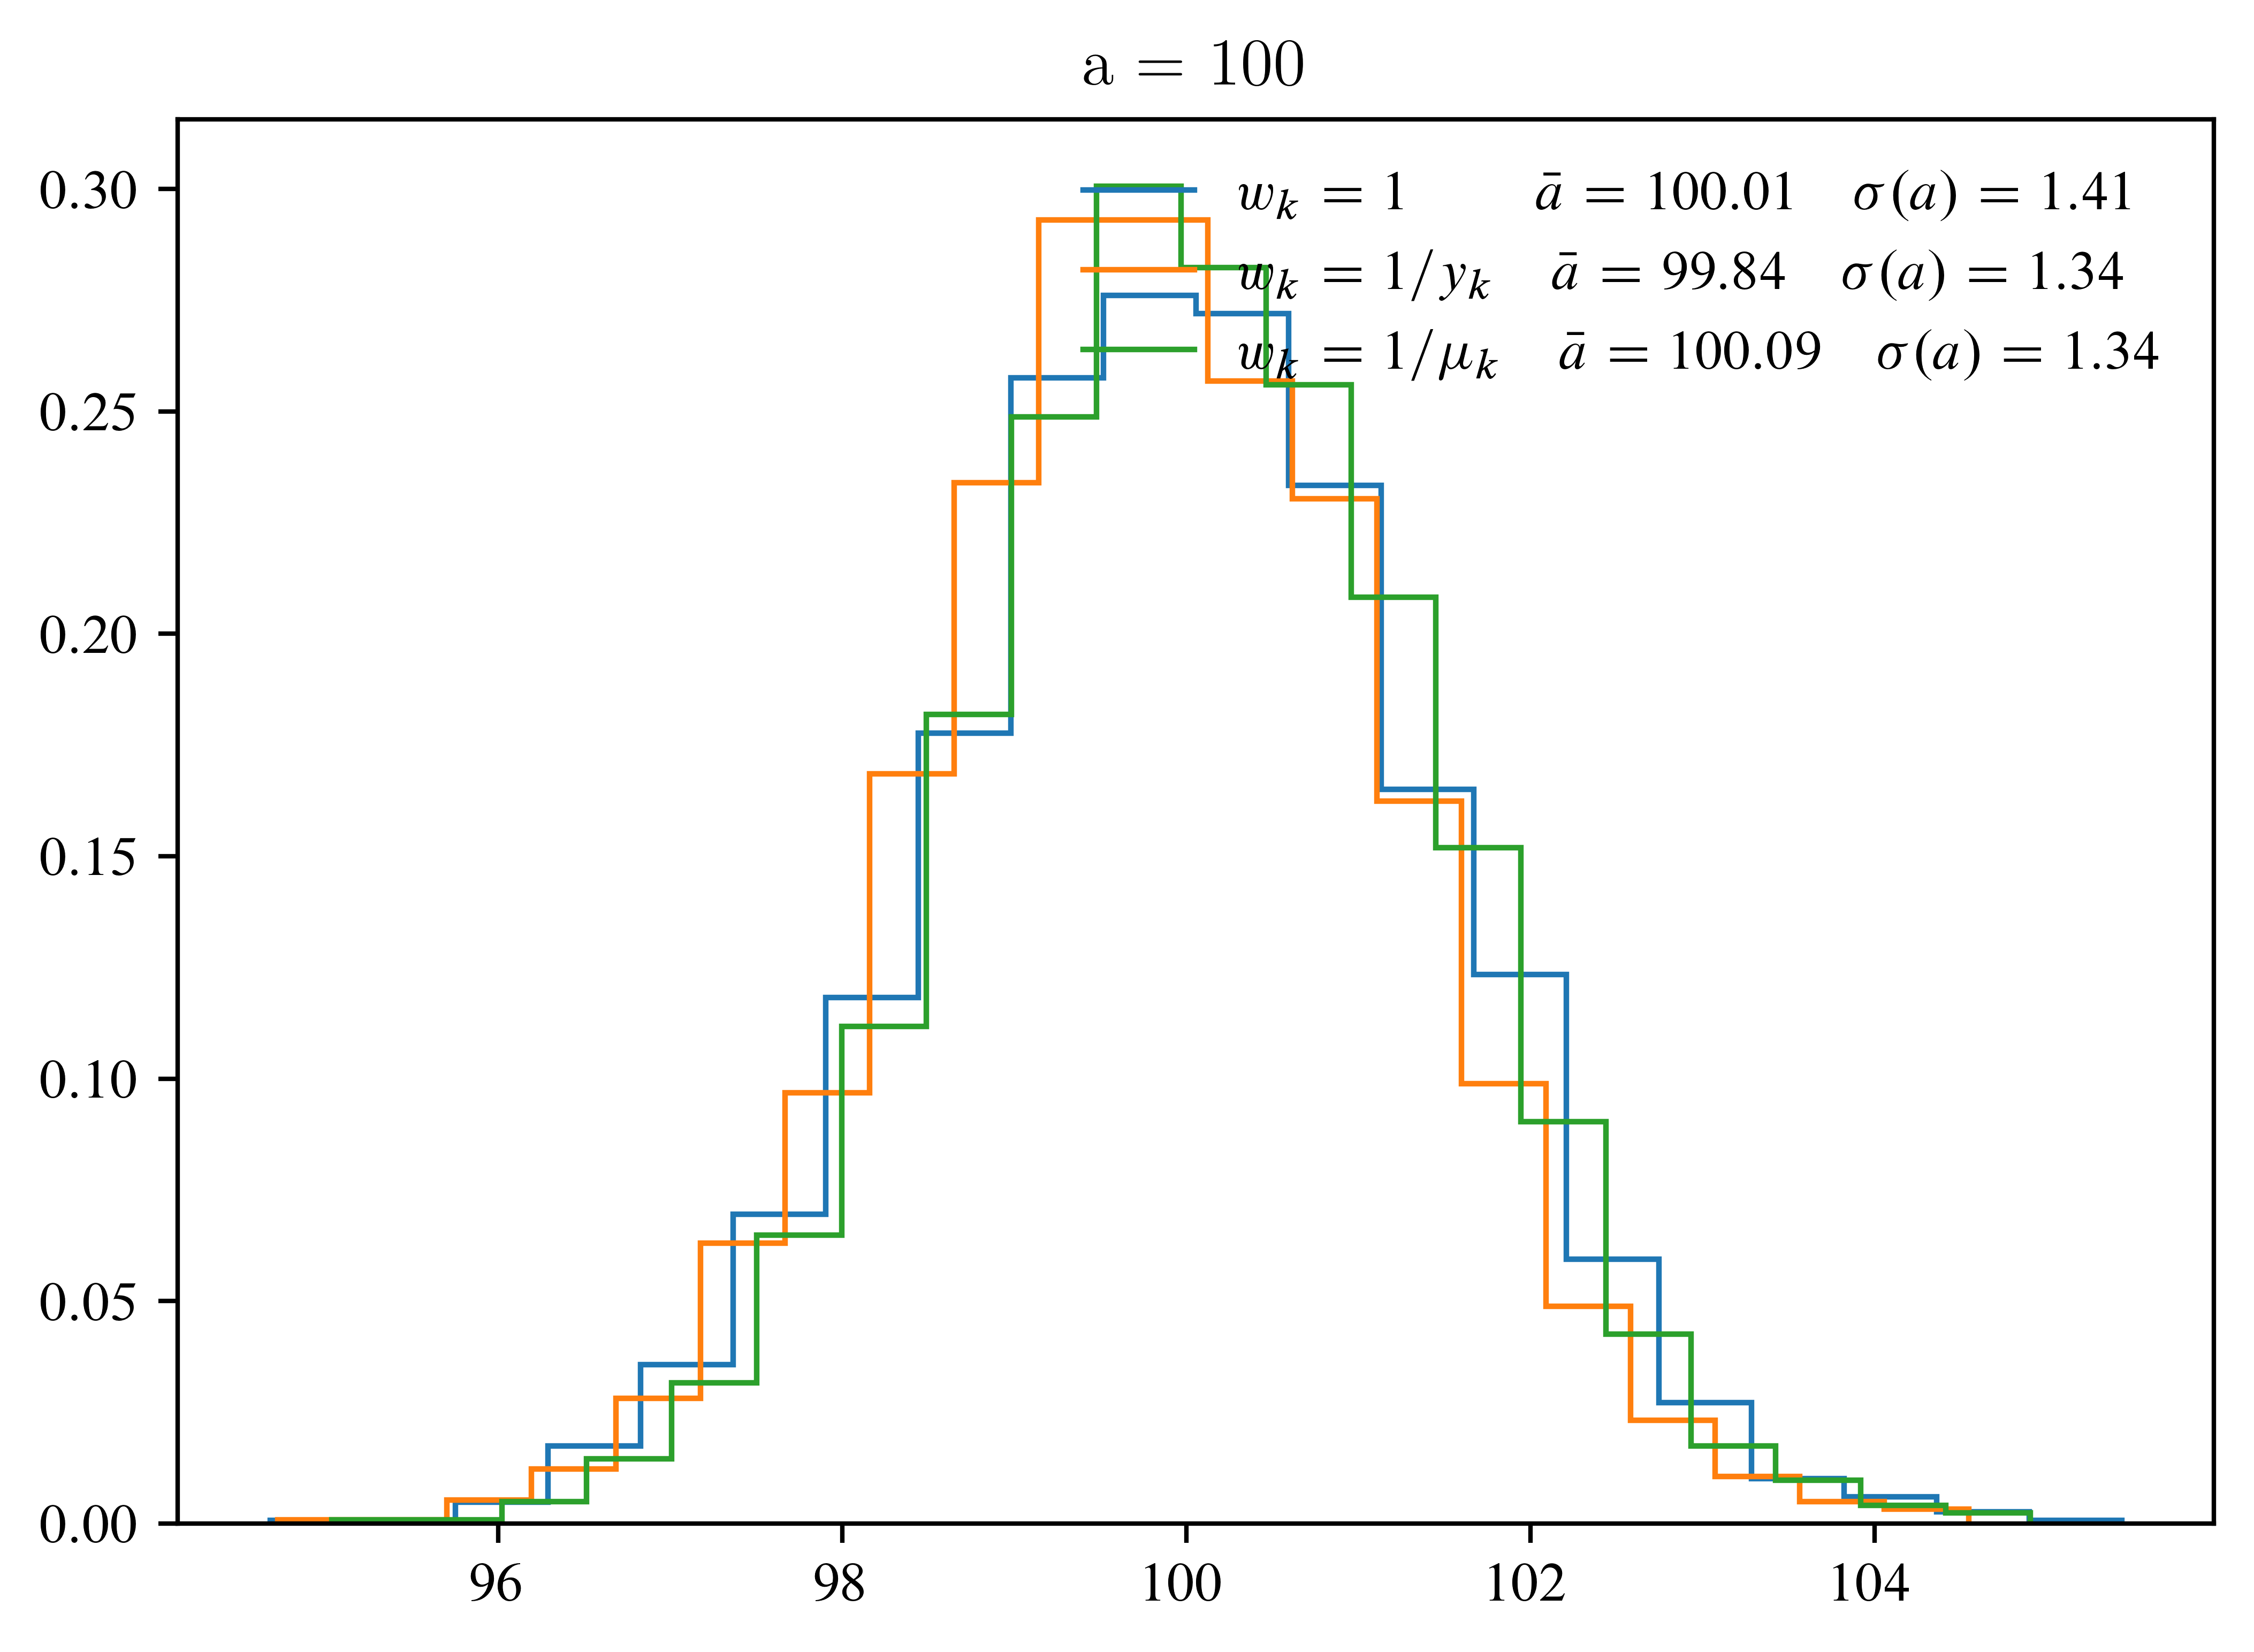

In [2]:
def generate(a, n=10, size=5000):
    k = np.arange(1, n + 1)  # Indices of the y_k, so [1,2,...,10]
    y = rng.poisson(
        a * k, size=(size, n)
    )  # draw size times n (=len(ks)) poisson numbers with mean a*k
    return k, y


estimators = {
    # lambda: anonymous functions
    "1\\;\\quad": lambda k, y: np.sum(y * k) / np.sum(k**2),
    # this can go wrong for small a (as y=0)
    "1/y_k": lambda k, y: np.sum(k) / np.sum(k**2 / y),
    # this will go wrong for a = 0
    "1/\\mu_k": lambda k, y: np.sqrt(np.sum(y**2 / k) / np.sum(k)),
}

for a in (1, 100):
    k, y = generate(a)
    plt.figure(figsize=(5.5, 4), layout="constrained")
    for label, estim in estimators.items():
        with np.errstate(divide="ignore"):
            ab = [estim(k, yb) for yb in y]
        ma = np.mean(ab)
        sa = np.std(ab)
        w, xe = np.histogram(ab, bins=20)
        w = w / np.sum(w) / np.diff(xe)
        plt.stairs(
            w,
            xe,
            label=f"$w_k = {label} \\quad \\bar{{a}} = {ma:3.2f} \\quad \\sigma(a) = {sa:.2f}$",
        )
    plt.title(f"a = {a}")
    plt.legend(frameon=False, loc="upper right")